In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from utils import *
import matplotlib.pyplot as plt


In [28]:
# load dataset
# shoppingData = load_data("shopping.csv")

shoppingData = pd.read_csv("shopping.csv")

Transform shopping data

In [29]:

transformMonth = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
transformVisitorType = {'Returning_Visitor': 1, 'New_Visitor': 2, 'Other': 3}
transformTrueFalse = {'True': 1, 'False': 0}


shoppingData["Month"] = shoppingData["Month"].map(transformMonth)
shoppingData["VisitorType"] = shoppingData["VisitorType"].map(transformVisitorType)
#shoppingData["Weekend"] = shoppingData["Weekend"].map(transformTrueFalse)
#shoppingData["Revenue"] = shoppingData["Revenue"].map(transformTrueFalse)

shoppingData['Weekend'] = shoppingData['Weekend'].astype(int)
shoppingData['Revenue'] = shoppingData['Revenue'].astype(int)



X = shoppingData.drop('Revenue', axis=1)
y = shoppingData['Revenue']

print(X.head())
#print(y.head())

   Administrative  Administrative_Duration  Informational  \
0               3               142.500000              0   
1               6               437.391304              2   
2               1                41.125000              0   
3               2               141.000000              0   
4              18               608.140000              6   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00              48              1052.255952   
1                  235.55              83              2503.881781   
2                    0.00             126              4310.004668   
3                    0.00              10               606.666667   
4                  733.80             168              4948.398759   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0     0.004348   0.013043    0.000000         0.0     11                 1   
1     0.002198   0.004916    2.086218         0.0      3

Normalization functions and minmax scaling

In [30]:
def meanNormalization(X):
    return (X-X.mean()) / (X.max()-X.min())

def zNormalization(X):
    return (X-X.mean()) / X.std()

def scaleMinMax(X):
    return (X-X.min()) / (X.max()-X.min())

XMean = meanNormalization(X)
XZNorm = zNormalization(X)
XMinMax = scaleMinMax(X)

In [31]:
def trainDeez(X_train, y_train, alpha, num_iters):
    m, n = X_train.shape
    w = np.zeros(n)
    b = 0

    for i in range(num_iters):
        costVal = compute_cost(X_train, y_train, w, b)
        dj_db, dj_dw = compute_gradient(X_train, y_train, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if(i % 100 == 0):
            print(f"Iterations: {i} | Cost: {costVal}")
            
    return w, b

alphaRate = 0.05
iterations = 100

wNone, bNone = trainDeez(X, y, alphaRate, iterations)
wMinMax, bMinMax = trainDeez(XMinMax, y, alphaRate, iterations)
wMean, bMean = trainDeez(XMean, y, alphaRate, iterations)
wZNorm, bZNorm = trainDeez(XZNorm, y, alphaRate, iterations)

Iterations: 0 | Cost: 0.6931471803599453


Iterations: 0 | Cost: 0.6931471803599453
Iterations: 0 | Cost: 0.6931471803599453
Iterations: 0 | Cost: 0.6931471803599453


In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=445)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=445)

tf.random.set_seed(1234)
model = Sequential(
    [
        #tf.keras.Input(X.shape[1]),

        Dense(128, activation="relu", input_dim=X_train.shape[1], name="l1"),
        Dense(64, activation="relu", name="l2"),
        Dense(32, activation="relu", name="l3"),
        Dense(1, activation="sigmoid", name="l4")

    ], name="myModel"
)



In [33]:
model.summary()

Model: "myModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 128)               2304      
                                                                 
 l2 (Dense)                  (None, 64)                8256      
                                                                 
 l3 (Dense)                  (None, 32)                2080      
                                                                 
 l4 (Dense)                  (None, 1)                 33        
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)


history = model.fit(
    X_train, y_train,
    epochs=70, 
    batch_size=64, validation_data=(X_cv, y_cv)
)

Epoch 1/70
47/47 [==============================] - 2s 14ms/step - loss: 6.7434 - accuracy: 0.7483 - val_loss: 0.8901 - val_accuracy: 0.8692
Epoch 2/70
47/47 [==============================] - 0s 6ms/step - loss: 0.7892 - accuracy: 0.8350 - val_loss: 0.3596 - val_accuracy: 0.8675
Epoch 3/70
47/47 [==============================] - 0s 7ms/step - loss: 0.4331 - accuracy: 0.8693 - val_loss: 0.3528 - val_accuracy: 0.8750
Epoch 4/70
47/47 [==============================] - 0s 5ms/step - loss: 0.3519 - accuracy: 0.8770 - val_loss: 0.7596 - val_accuracy: 0.8517
Epoch 5/70
47/47 [==============================] - 0s 5ms/step - loss: 0.5464 - accuracy: 0.8660 - val_loss: 0.4286 - val_accuracy: 0.8708
Epoch 6/70
47/47 [==============================] - 0s 6ms/step - loss: 0.3735 - accuracy: 0.8773 - val_loss: 0.3398 - val_accuracy: 0.8800
Epoch 7/70
47/47 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.8870 - val_loss: 0.3274 - val_accuracy: 0.8642
Epoch 8/70
47/47 [=

Test to find accuracy

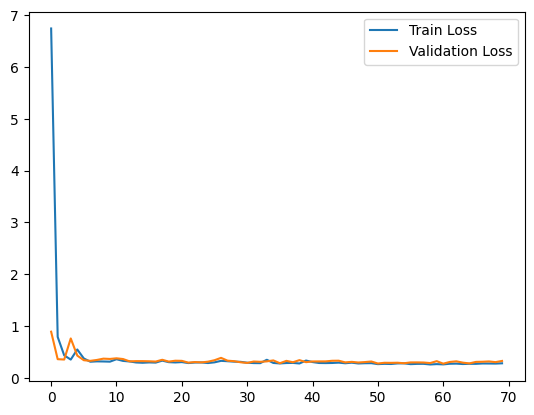

In [35]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [36]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.55).astype(int)

#y_pred = model.predict_classes(X_test)

y_pred = y_pred.flatten()

# Calculate evaluation metrics
accuracy = np.mean(y_pred.flatten() == y_test)
precision = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1)
recall = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Test Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

25/25 [==============================] - 0s 2ms/step
Test Accuracy: 0.86
Precision: 0.77
Recall: 0.29
F1 Score: 0.42


In [37]:
def getAccuracy(X_train, y_train, w, b):
    predictVal = predict(X_train, w, b)
    #Debug print(predictVal)
    predictValRounded = np.round(predictVal)
    #Debug print(predictValRounded)
    acc = np.mean(predictValRounded == y_train)

    return acc


#Load in and transform the data from the unseen csv file
unseenData = pd.read_csv("unseen.csv")

unseenData["Month"] = unseenData["Month"].map(transformMonth)
unseenData["VisitorType"] = unseenData["VisitorType"].map(transformVisitorType)

unseenData['Weekend'] = unseenData['Weekend'].astype(int)
unseenData['Revenue'] = unseenData['Revenue'].astype(int)



unseenX = unseenData.drop('Revenue', axis=1)
unseeny = unseenData['Revenue']


unseenXMinMax = scaleMinMax(unseenX)
unseenXMean = zNormalization(unseenX)
unseenXZNorm = meanNormalization(unseenX)

accNone = getAccuracy(unseenX, unseeny, wNone, bNone)

accMinMax = getAccuracy(unseenXMinMax, unseeny, wMinMax, bMinMax)

accMean = getAccuracy(unseenXMean, unseeny, wMean, bMean)

accZNorm = getAccuracy(unseenXZNorm, unseeny, wZNorm, bZNorm)

print(f'No Scaling Accuracy = {accNone}')
print(f'Min Max Scaling Accuracy = {accMinMax}')
print(f'Mean Normalization = {accMean}')
print(f'Z Score Normalization Accuracy = {accZNorm}')



No Scaling Accuracy = 0.848
Min Max Scaling Accuracy = 0.848
Mean Normalization = 0.848
Z Score Normalization Accuracy = 0.848


Regularization

Scaling choice: MinMax

In [38]:
def trainDeezReg(X_train, y_train, alpha, num_iters, lambda_):
    m, n = X_train.shape
    w = np.zeros(n)
    b = 0

    for i in range(num_iters):
        costVal = compute_cost_reg(X_train, y_train, w, b)
        dj_db, dj_dw = compute_gradient_reg(X_train, y_train, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if(i % 100 == 0):
            print(f"Iterations: {i} | Cost: {costVal}")
            
    return w, b

def compute_cost_reg(X, y, w, b, lambda_ = 1):
    m, n = X.shape

    cost_without_reg = compute_cost(X, y, w, b) 

    reg_cost = 0.

    for i in range (n):
        reg_cost += w[i] ** 2
    reg_cost *= (lambda_/(2*m))

    total_cost = cost_without_reg + reg_cost

    return total_cost


def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)
 
    regularization = (lambda_/m) * w
    
    dj_dw += regularization

    return dj_db, dj_dw

In [39]:
lambdaVal = 1

wReg, bReg = trainDeezReg(XMinMax, y, alphaRate, iterations, lambdaVal)

accReg = getAccuracy(unseenXMinMax, unseeny, wReg, bReg)

print(f'Min Max Scaling Accuracy (Regularization) = {accReg}')

Iterations: 0 | Cost: 0.6931471803599453


Min Max Scaling Accuracy (Regularization) = 0.848
